In [1]:
# Libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
import io
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

## Data exploration

In [4]:
train.shape

(250, 302)

In [5]:
test.shape

(19750, 301)

In [6]:
train.head()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,-0.338,0.416,-2.177,-0.326,0.340,1.174,-0.245,-1.070,-0.336,-0.502,0.403,-0.605,-0.280,-1.618,0.878,-0.272,0.870,2.171,-0.214,0.477,-2.092,0.835,0.621,-2.810,1.029,-0.736,0.582,-0.079,0.493,1.359,-0.177,0.406,-0.163,1.341,0.754,0.491,-1.560,-0.520,0.766,0.216,-0.510,0.101,-0.602,-0.721,-0.545,1.564,2.003,-1.940,1.285,-0.987,-1.370,1.373,-0.495,0.113,-0.523,0.053,-0.888,0.249,0.687,1.363,0.169,-1.122,1.209,0.891,0.866,0.847,-1.110,1.224,-1.302,-1.647,-0.091,0.255,0.730,-0.380,0.294,-0.725,0.844,1.002,-1.267,-0.043,1.158,0.779,-0.733,-0.501,1.841,1.459,0.847,1.926,-0.316,0.044,-0.294,0.120,-1.050,0.730,-1.001,-0.321,0.407,0.469,0.445,1.632,0.273,1.557,1.196,-0.548,-0.275,0.179,0.584,-1.873,0.928,0.720,0.885,0.044,-1.131,-1.576,0.616,1.957,-0.518,1.494,1.573,-0.484,0.590,-0.387,0.388,-1.032,-0.841,0.288,-0.230,-2.714,-0.473,0.476,-1.352,-0.922,0.329,-0.558,0.787,-1.043,-0.130,0.517,2.445,0.847,-0.636,-0.324,0.753,0.058,-1.461,-0.820,-0.076,1.127,-0.496,1.020,0.279,0.262,-0.277,-0.166,-0.089,-1.696,-0.598,-0.710,-0.431,0.355,0.966,-1.150,-0.156,0.393,-0.117,0.444,0.948,-0.608,-0.106,-0.491,-0.608,1.565,1.013,-1.391,0.807,-0.607,-0.856,1.230,0.124,-0.336,1.758,-1.649,-1.429,-1.322,-1.501,2.125,-0.572,1.178,-1.451,-0.374,2.386,1.883,0.758,0.295,1.261,-0.837,0.140,-0.183,0.756,0.616,1.371,0.820,-0.702,-1.266,0.496,-0.669,-0.325,-0.170,0.147,-1.134,0.077,1.271,-0.087,-1.431,1.640,0.694,0.949,-2.400,0.657,-0.431,0.124,-0.335,-2.820,0.573,-0.755,3.798,-0.001,0.998,-0.543,1.018,0.883,-1.037,0.513,0.694,0.856,-0.523,0.596,0.971,0.279,2.684,-0.057,-1.754,0.297,-2.196,0.798,-0.533,-0.661,0.564,-2.400,0.945,-0.971,0.055,1.107,-0.848,-1.781,0.254,-0.515,0.234,0.296,-1.774,2.032,-0.442,-0.116,1.393,-0.494,-0.179,1.874,1.463,-1.397,0.284,0.336,0.551,0.557,-0.522,-0.503,-0.541,1.393,0.506,-1.420,-0.123,-1.833,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,1.202,0.542,0.424,-1.572,-0.968,-1.483,0.564,0.047,-0.324,-1.490,0.179,-0.524,0.250,2.462,0.029,-1.399,-2.370,-1.505,-1.294,0.106,-0.145,0.235,-1.045,1.335,1.254,-0.811,1.812,0.181,-0.020,1.125,0.279,-0.682,1.161,1.194,0.243,1.179,1.338,-1.000,-0.362,-0.605,1.917,-1.157,0.394,-0.482,1.591,0.106,-0.959,0.600,-1.147,-1.064,3.080,1.057,0.947,-1.125,1.288,-0.171,1.124,-0.454,0.698,-0.028,2.208,0.014,0.872,2.286,-0.822,0.416,1.486,-0.331,-0.993,-0.071,0.543,-0.096,0.041,0.138,1.110,0.692,1.407,-0.234,-1.899,-0.131,0.934,0.802,-1.041,2.004,1.424,0.423,-0.352,-0.656,-0.053,1.036,-1.228,-0.854,-0.748,1.180,0.575,-1.472,-1.215,-0.889,0.004,-0.145,-0.933,-0.713,0.869,0.539,-0.911,-0.638,0.895,-1.896,-0.604,0.312,1.883,-0.292,-0.849,-0.453,0.894,0.339,2.095,0.336,1.290,0.057,-0.159,0.539,0.675,-1.015,-0.304,-1.301,-0.614,-1.176,0.117,0.075,-0.088,1.888,-0.119,0.434,0.135,1.779,0.5

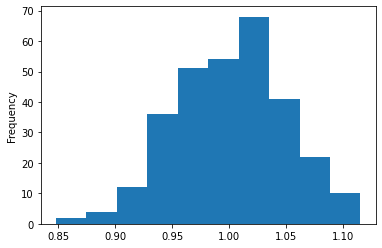

In [39]:
# 모든 열에 대해 표준편차 분포 확인
train[train.columns[2:]].std().plot.hist()

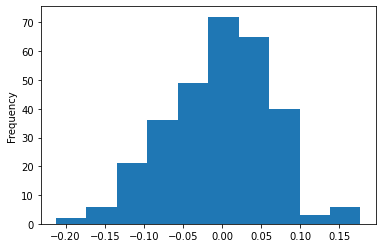

In [43]:
# 모든 열에 대해 평균 분포 확인
train[train.columns[2:]].mean().plot.hist()

+ 모든 열의 평균값이 -0.2와 0.15 사이다.
+ 표준편차가 매우 작다.

각 항목이 서로 비슷하다고 할 수 있다.

In [45]:
# null값 확인
train.isnull().any().any()

False

In [48]:
train['target'].value_counts()

0.0    183
1.0     67
Name: target, dtype: int64

+ target은 약간의 불균형을 갖고 있음.

In [11]:
# feature별 상관관계 확인
# reset_index : 기존 인덱스를 데이터 열로 추가
corrs = train.corr().abs().unstack().sort_values().reset_index()
# 같은항목 간의 상관관계 제거
corrs = corrs[corrs['level_0'] != corrs['level_1']]
corrs.tail(10)

,level_0,level_1,0
90892,219,279,0.238512
90893,279,219,0.238512
90894,23,20,0.246984
90895,20,23,0.246984
90896,146,228,0.258447
90897,228,146,0.258447
90898,6,39,0.267727
90899,39,6,0.267727
90900,127,target,0.337540
90901,target,127,0.337540


+ 항목간의 상관관계가 0.27보다 작음
+ 제거할 수 있는 상관관계가 높은 항목이 없음.

## Prepare the Data

In [17]:
# id, target 열 삭제
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']
X_test = test.drop(['id'], axis=1)

## Basic Modeling

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import GenericUnivariateSelect, SelectPercentile, SelectKBest, f_classif, mutual_info_classif, RFECV

In [19]:
prediction = np.zeros(len(X_test))
# 점수 리스트
scores_train = []
scores_valid = []
# 라벨 분포유지 folds, 42는 관행적...
folds = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

In [24]:
# fold별 데이터 생성
for fold_n, (train_idx, valid_idx) in enumerate(folds.split(X_train, y_train)):
  X_train_fold, X_valid_fold = X_train.loc[train_idx], X_train.loc[valid_idx]
  y_train_fold, y_valid_fold = y_train[train_idx], y_train[valid_idx]
  break

In [26]:
from sklearn import linear_model
import statsmodels.api as sm
# 모델 설정, L1 많은 항목있을때 유용함
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
model.fit(X_train_fold,y_train_fold)

# Receiver Operating Characteristic curve Area Under Curve
y_pred_train = model.predict(X_train_fold).reshape(-1,1)
train_score = roc_auc_score(y_train_fold,y_pred_train)

y_pred_valid = model.predict(X_valid_fold).reshape(-1,1)
valid_score = roc_auc_score(y_valid_fold,y_pred_valid)

In [27]:
print(train_score, valid_score)

0.8720580186097429 0.763888888888889


In [34]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred

array([0.71277623, 0.52420204, 0.54385416, ..., 0.5939308 , 0.37402355,
       0.47397576])

In [35]:
def train_model(X_train, y_train, X_test, folds=folds, model=None):
  prediction = np.zeros(len(X_test))
  scores_train = []
  scores_valid = []

  for fold_n, (train_idx, valid_idx) in enumerate(folds.split(X_train,y_train)):
    X_train_fold, X_valid_fold = X_train[train_idx], X_train[valid_idx]
    y_train_fold, y_valid_fold = y_train[train_idx], y_train[valid_idx]

    model.fit(X_train_fold,y_train_fold)
    y_pred_train = model.predict(X_train_fold).reshape(-1,1)
    train_score = roc_auc_score(y_train_fold,y_pred_train)
    scores_train.append(train_score)
    
    y_pred_valid = model.predict(X_valid_fold).reshape(-1,1)
    valid_score = roc_auc_score(y_valid_fold,y_pred_valid)
    scores_valid.append(valid_score)

    # 예측 확률
    y_pred = model.predict_proba(X_test)[:,1]
    prediction += y_pred
  # 예측 평균
  prediction /= folds.get_n_splits()

  print(f'Mean train auc: {np.mean(scores_train):.4f}, std: {np.std(scores_train):.4f}.')
  print(f'Mean valid auc: {np.mean(scores_valid):.4f}, std: {np.std(scores_valid):.4f}.')
    
  return scores_valid, prediction


In [38]:
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
scores, prediction = train_model(X_train.values, y_train, X_test, folds=folds,  model=model)

Mean train auc: 0.8784, std: 0.0105.
Mean valid auc: 0.7153, std: 0.1293.
